
# <span style="color:rgb(213,80,0)">Joint Angle Exploration Tutorial</span>

**Sean Osis, Allan Brett, Reed Ferber, Reginaldo Fukuchi, Blayne Hettinga**

### Purpose

The purpose of this tutorial is to demonstrate the application of techniques for:

-  Determining matched samples and splitting data
-  Examining demographic data
-  Calculating joint angles from code in supplemental material
-  Visualizing joint angles
-  Generating a data set for further analysis

**Requirements**

-  MATLAB 2016a or later and a supported OS
-  MATLAB Statistics and Machine Learning Toolbox
-  Code package included with supplemental material
-  Open access data set included with supplemental material
### Load Meta Data

In this section, data are loaded from CSV files that have been included with this project. The CSV files contain metadata tabulated for all subjects.


In [1]:
% Format number display
format bank


In [2]:
% Point to the data folders
% Modify these directories as required
jsondir = '../Output_folder/reformat_data';
csvdir  = '../Output_folder';

% Obtain list of JSONs
jsons = dir(fullfile(jsondir, '/*/*.json'));
csvs  = dir(fullfile(csvdir, '*.csv'));

jsons(1)

ans = struct with fields:
       name: '20110531T161051.json'
eformat_data\100001'
       date: '08-Mar-2023 12:48:00'
      bytes: 7244825.00
      isdir: 0
    datenum: 738953.53

In [3]:
csvs(1)

ans = struct with fields:
       name: 'run_data_meta.csv'
     folder: 'Z:\Figshare Project\Output_folder'
       date: '02-May-2023 08:45:28'
      bytes: 389279.00
      isdir: 0
    datenum: 739008.36

In [4]:
% Load CSVs and extract required variables

csv_ = cell(length(csvs),1);
for i = 1:length(csvs)
    csv_{i} = readtable(fullfile(csvs(i).folder, csvs(i).name));
    if contains(csvs(i).name, 'run')
       csv_{i}.gaitspeed = csv_{i}.speed_r;
       csv_{i}.gaittype(:)  = "run";
       csv_{i}.speed_r = [];
    else
       csv_{i}.gaitspeed = csv_{i}.speed_w;
       csv_{i}.gaittype(:)  = "walk";
       csv_{i}.speed_w = [];
    end
end

csv_ = vertcat(csv_{:});

csv_ = csv_(:, {'sub_id','datestring','filename','age','Gender','Height','Weight','gaitspeed','gaittype','InjDefn'});

size(csv_)

ans = 1x2
       3920.00         10.00

In [5]:

csv_.Properties.VariableNames'

ans = 10x1 cell
'sub_id'    
'datestring'
'filename'  
'age'       
'Gender'    
'Height'    
'Weight'    
'gaitspeed' 
'gaittype'  
'InjDefn'

In [6]:
% Filter out subjects with missing data
csv_ = rmmissing(csv_,1);

% Remove walking data
csv_ = csv_(csv_.gaittype == "run",:);

% Remove subjects outside age bounds
csv_ = csv_(csv_.age >= 20 & csv_.age <= 65,:);


In [7]:
% Quantiles for height and mass
p = 0:0.1:1;

disp('Quantiles for Height')

Quantiles for Height

In [8]:
y = quantile(csv_.Height,p);
disp([p;y])

  Columns 1 through 9
             0          0.10          0.20          0.30          0.40          0.50          0.60          0.70          0.80
             0        160.00        164.33        167.00        170.00        172.60        175.00        178.00        180.40
  Columns 10 through 11
          0.90          1.00
        184.00        999.00

In [9]:

disp('Quantiles for Mass')

Quantiles for Mass

In [10]:
y = quantile(csv_.Weight,p);
disp([p;y])

  Columns 1 through 9
             0          0.10          0.20          0.30          0.40          0.50          0.60          0.70          0.80
             0         54.74         58.63         62.00         65.51         69.30         72.79         76.70         81.00
  Columns 10 through 11
          0.90          1.00
         87.76       1564.00

In [11]:
% Filter out erroneous height and mass data
csv_ = csv_(csv_.Height > 0 & csv_.Height < 999,:);
csv_ = csv_(csv_.Weight > 0 & csv_.Weight < 200,:);


In [12]:
disp('Quantiles for Height')

Quantiles for Height

In [13]:
y = quantile(csv_.Height,p);
disp([p;y])

  Columns 1 through 9
             0          0.10          0.20          0.30          0.40          0.50          0.60          0.70          0.80
        120.00        160.00        164.40        167.00        170.00        172.60        175.00        178.00        180.40
  Columns 10 through 11
          0.90          1.00
        184.00        196.50

In [14]:

disp('Quantiles for Mass')

Quantiles for Mass

In [15]:
y = quantile(csv_.Weight,p);
disp([p;y])

  Columns 1 through 9
             0          0.10          0.20          0.30          0.40          0.50          0.60          0.70          0.80
         42.50         54.80         58.65         62.00         65.50         69.30         72.70         76.70         81.00
  Columns 10 through 11
          0.90          1.00
         87.70        176.00



### Subject Matching

In this section, subjects are partitioned into male and female groups and a matching optimization is performed to obtain two groups of individuals similarly matched on age, height, mass, and gait speed.


In [16]:
group_m = csv_(csv_.Gender == "Male",:);
group_f = csv_(csv_.Gender == "Female",:);

arr_m = table2array(group_m(:,{'age','Height','Weight','gaitspeed'}));
arr_f = table2array(group_f(:,{'age','Height','Weight','gaitspeed'}));


In [17]:
% Compute pairwise distances
arr_d = pdist2(arr_m,arr_f,'seuclidean');

% Use linear assignment optimization to solve for closest matches
% Second argument specifies the cost penatly for not matching
% Setting this cost higher results in more low-quality matches
arr_match = matchpairs(arr_d,0.3);

disp(['Number of matches is ' num2str(length(arr_match))])

Number of matches is 191

In [18]:
group_f = group_f(arr_match(:,2),:);
group_m = group_m(arr_match(:,1),:);



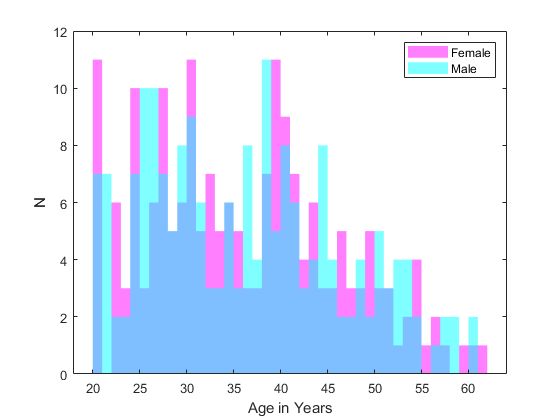

In [19]:
% Confirm similiarity of distributions
figure;
histogram(group_f.age,'BinWidth',1,'facecolor','magenta','facealpha',.5,'edgecolor','none');
hold on
histogram(group_m.age,'BinWidth',1,'facecolor','cyan','facealpha',.5,'edgecolor','none');
legend('Female','Male')
xlabel('Age in Years')
ylabel('N')


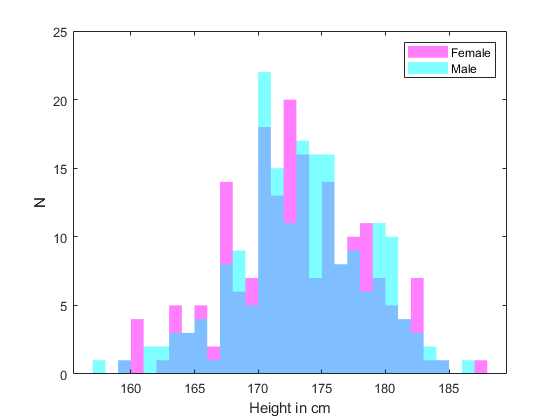

In [20]:

figure;
histogram(group_f.Height,'BinWidth',1,'facecolor','magenta','facealpha',.5,'edgecolor','none');
hold on
histogram(group_m.Height,'BinWidth',1,'facecolor','cyan','facealpha',.5,'edgecolor','none');
legend('Female','Male')
xlabel('Height in cm')
ylabel('N')


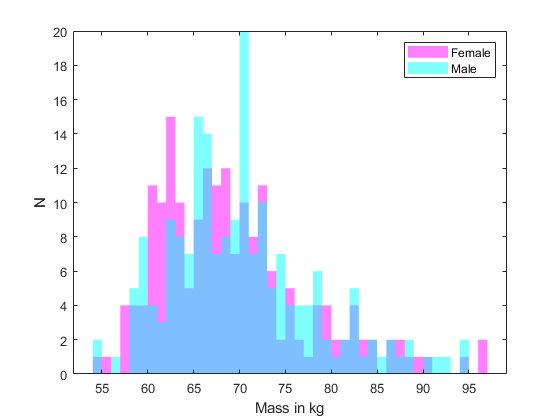

In [21]:

figure;
histogram(group_f.Weight,'BinWidth',1,'facecolor','magenta','facealpha',.5,'edgecolor','none');
hold on
histogram(group_m.Weight,'BinWidth',1,'facecolor','cyan','facealpha',.5,'edgecolor','none');
legend('Female','Male')
xlabel('Mass in kg')
ylabel('N')


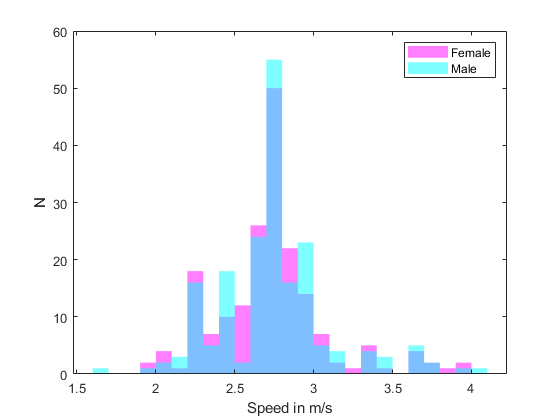

In [22]:

figure;
histogram(group_f.gaitspeed,'BinWidth',0.1,'facecolor','magenta','facealpha',.5,'edgecolor','none');
hold on
histogram(group_m.gaitspeed,'BinWidth',0.1,'facecolor','cyan','facealpha',.5,'edgecolor','none');
legend('Female','Male')
xlabel('Speed in m/s')
ylabel('N')


From the histograms, no obvious differences are seen between the male and female groups on age, height, mass or gait speed. Therefore, we will continue exploring joint angles for these two groups.

### Load Biomechanics Data

In this section, corresponding JSONs are loaded into memory and data required for kinematic calculations are extracted for further processing.


In [23]:
neutrals_m = cell(height(group_m),1);
joints_m   = neutrals_m;
dynamics_m = neutrals_m;
hz_m       = neutrals_m;

neutrals_f = neutrals_m;
joints_f   = neutrals_m;
dynamics_f = neutrals_m;
hz_f       = neutrals_m;

for i = 1:height(group_m)

    % For male group

    json_file = fullfile(jsondir, num2str(group_m.sub_id(i)), group_m.filename{i});

    fid = fopen(json_file);
    raw = fread(fid,inf);
    str = char(raw');
    fclose(fid);
    out = jsondecode(str);

    fields = fieldnames(out.joints);
    for j = 1:size(fields,1)
        out.joints.(fields{j,1}) = transpose(out.joints.(fields{j,1}));
    end

    fields = fieldnames(out.neutral);
    for j = 1:size(fields,1)
        out.neutral.(fields{j,1}) = transpose(out.neutral.(fields{j,1}));
    end

    neutrals_m{i,1} = out.neutral;
    joints_m{i,1}   = out.joints;
    dynamics_m{i,1} = out.running;
    hz_m{i,1}       = out.hz_r;


    % For female group

    json_file = fullfile(jsondir,num2str(group_f.sub_id(i)), group_f.filename{i});

    fid = fopen(json_file);
    raw = fread(fid,inf);
    str = char(raw');
    fclose(fid);
    out = jsondecode(str);

    fields = fieldnames(out.joints);
    for j = 1:size(fields,1)
        out.joints.(fields{j,1}) = transpose(out.joints.(fields{j,1}));
    end

    fields = fieldnames(out.neutral);
    for j = 1:size(fields,1)
        out.neutral.(fields{j,1}) = transpose(out.neutral.(fields{j,1}));
    end

    neutrals_f{i,1} = out.neutral;
    joints_f{i,1}   = out.joints;
    dynamics_f{i,1} = out.running;
    hz_f{i,1}       = out.hz_r;

    if mod(i,10) == 0
        disp(['Completed ' num2str(i/height(group_m)*100,'%.1f') '% of files'])
    end

end

Completed 5.2% of files
Completed 10.5% of files
Completed 15.7% of files
Completed 20.9% of files
Completed 26.2% of files
Completed 31.4% of files
Completed 36.6% of files
Completed 41.9% of files
Completed 47.1% of files
Completed 52.4% of files
Completed 57.6% of files
Completed 62.8% of files
Completed 68.1% of files
Completed 73.3% of files
Completed 78.5% of files
Completed 83.8% of files
Completed 89.0% of files
Completed 94.2% of files
Completed 99.5% of files

In [24]:

disp('All files loaded')

All files loaded



### Calculate Joint Angles

The following section calculates joint angles using established biomechanical techniques included in the supplemental material code.


In [25]:
hip_r_f = cell(length(neutrals_f),1);
hip_l_f = hip_r_f;

hip_r_m = cell(length(neutrals_m),1);
hip_l_m = hip_r_m;

for i = 1:length(hip_r_m)

    try
        % For males

        [angles,velocities,~,~,~] = gait_kinematics(joints_m{i,1},neutrals_m{i,1},dynamics_m{i,1},hz_m{i,1},0);
        [norm_ang,~,~,~,~,~,~,~]  = gait_steps(neutrals_m{i,1},dynamics_m{i,1},angles,velocities,hz_m{i,1},0);

        hip_r_m{i,1} = norm_ang.R_hip;
        hip_l_m{i,1} = norm_ang.L_hip;


        % For females

        [angles,velocities,~,~,~] = gait_kinematics(joints_f{i,1},neutrals_f{i,1},dynamics_f{i,1},hz_f{i,1},0);
        [norm_ang,~,~,~,~,~,~,~]  = gait_steps(neutrals_f{i,1},dynamics_f{i,1},angles,velocities,hz_f{i,1},0);

        hip_r_f{i,1} = norm_ang.R_hip;
        hip_l_f{i,1} = norm_ang.L_hip;

    catch

        hip_r_m{i,1} = 'err';
        hip_l_m{i,1} = 'err';
        hip_r_f{i,1} = 'err';
        hip_l_f{i,1} = 'err';

    end

    if mod(i,10) == 0
        disp(['Completed ' num2str(i/height(group_m)*100,'%.1f') '% of calculations'])
    end

end

Automated event detection failed, defaulting to foot-forward foot-back
Completed 5.2% of calculations
Completed 10.5% of calculations
Completed 15.7% of calculations
Completed 20.9% of calculations
Completed 26.2% of calculations
Completed 31.4% of calculations
Completed 36.6% of calculations
Completed 41.9% of calculations
Completed 47.1% of calculations
Completed 52.4% of calculations
Automated event detection failed, defaulting to foot-forward foot-back
Completed 57.6% of calculations
Automated event detection failed, defaulting to foot-forward foot-back
Completed 62.8% of calculations
Completed 68.1% of calculations
Completed 73.3% of calculations
Automated event detection failed, defaulting to foot-forward foot-back
Completed 78.5% of calculations
Completed 83.8% of calculations
Completed 89.0% of calculations
Automated event detection failed, defaulting to foot-forward foot-back
Completed 94.2% of calculations
Automated event detection failed, defaulting to foot-forward foot-back

In [26]:

disp('Calculations complete')

Calculations complete

In [27]:
% Remove incomplete calculation results
rm_id = find(cell2mat(cellfun(@(a,b,c,d) max([isequal(a,'err'),isequal(b,'err'),isequal(c,'err'),isequal(d,'err')]),hip_l_f,hip_l_m,hip_r_m,hip_r_f,'un',0)));

hip_r_f(rm_id) = [];
hip_l_f(rm_id) = [];
hip_r_m(rm_id) = [];
hip_l_m(rm_id) = [];

group_f(rm_id,:) = [];
group_m(rm_id,:) = [];


In [28]:
% Take median angles for each subject

hip_l_f = cellfun(@(x) squeeze(median(x,2)),hip_l_f,'un',0);
hip_r_f = cellfun(@(x) squeeze(median(x,2)),hip_r_f,'un',0);

hip_l_m = cellfun(@(x) squeeze(median(x,2)),hip_l_m,'un',0);
hip_r_m = cellfun(@(x) squeeze(median(x,2)),hip_r_m,'un',0);


In [29]:
% Merge data with existing tables

group_m.left_hip  = hip_l_m;
group_m.right_hip = hip_r_m;

group_f.left_hip  = hip_l_f;
group_f.right_hip = hip_r_f;


### Visualize Hip Joint Angles

Here we will visualize and qualitatively compare joint angle data between male and female groups. This is also an opportunity to remove any data that may be erroneous.



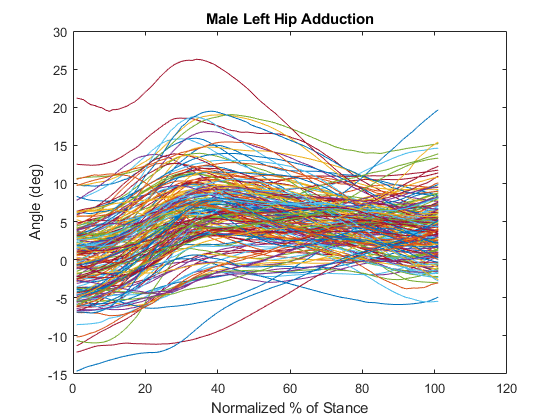

In [30]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,1),group_m.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Left Hip Adduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


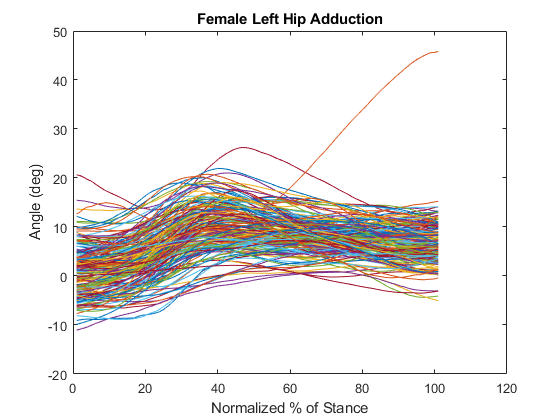

In [31]:

plt = cellfun(@(x) x(:,1),group_f.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Left Hip Adduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


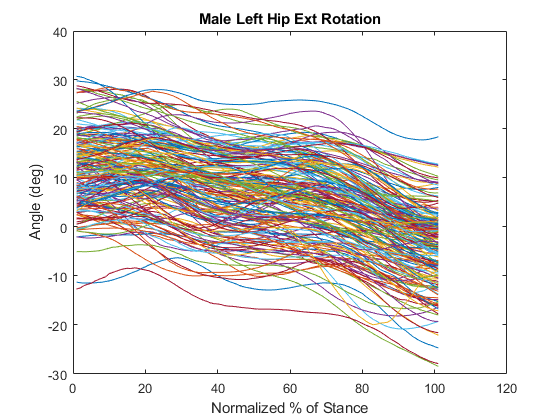

In [32]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,2),group_m.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Left Hip Ext Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


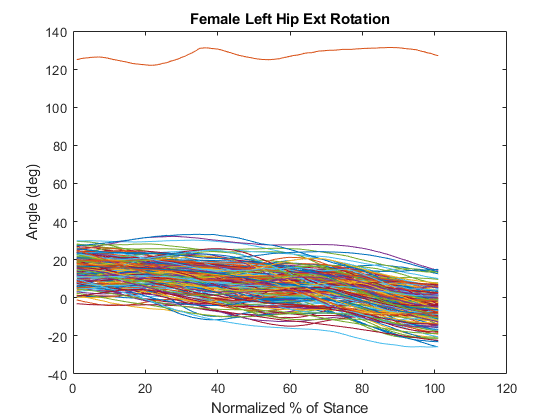

In [33]:

plt = cellfun(@(x) x(:,2),group_f.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Left Hip Ext Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


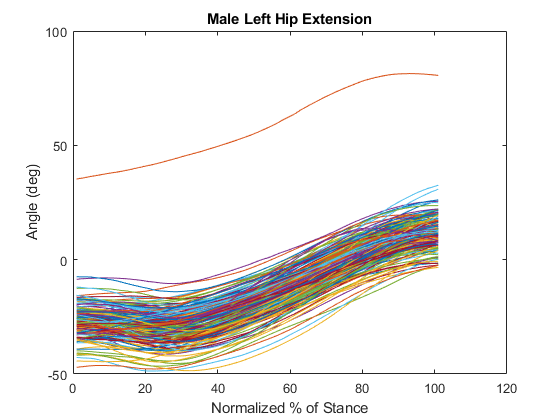

In [34]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,3),group_m.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Left Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


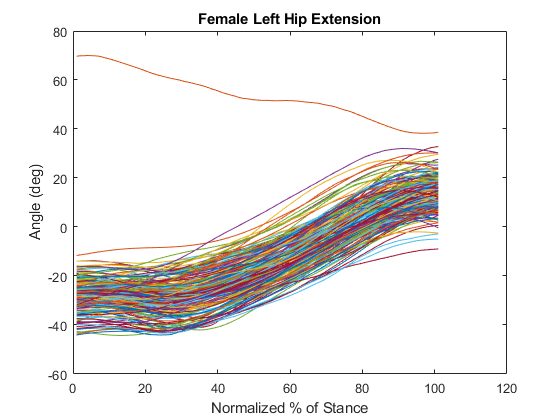

In [35]:

plt = cellfun(@(x) x(:,3),group_f.left_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Left Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')

In [36]:
% Remove subjects with erroneous data based on hip extension

data = cellfun(@(x) x(:,3),group_f.left_hip,'un',0);
data = horzcat(data{:});

idx = find(max(data,[],1) > 40);

group_f(idx,:) = [];
group_m(idx,:) = [];

data = cellfun(@(x) x(:,3),group_m.left_hip,'un',0);
data = horzcat(data{:});

idx = find(max(data,[],1) > 40);

group_f(idx,:) = [];
group_m(idx,:) = [];



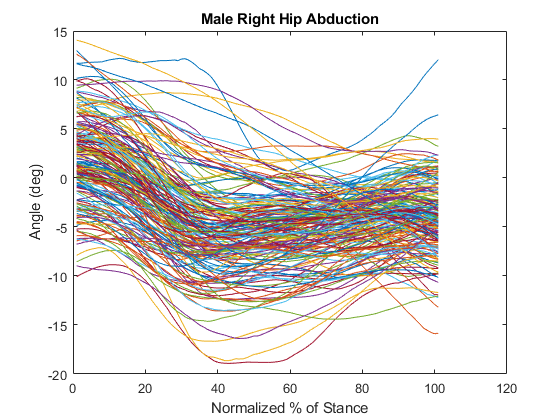

In [37]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,1),group_m.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Right Hip Abduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


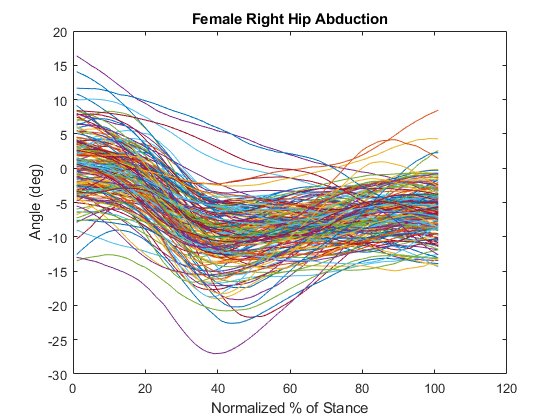

In [38]:

plt = cellfun(@(x) x(:,1),group_f.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Right Hip Abduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


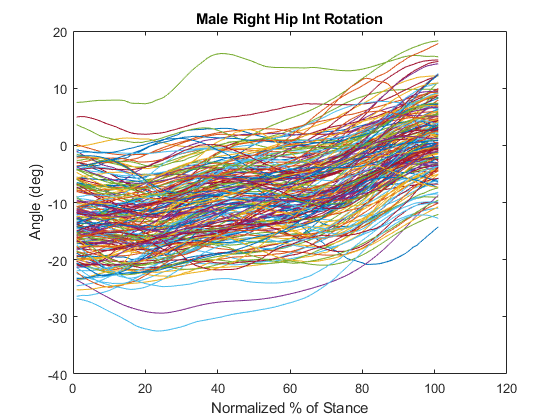

In [39]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,2),group_m.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Right Hip Int Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


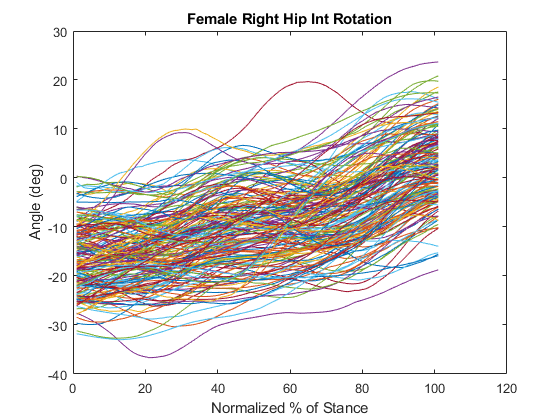

In [40]:

plt = cellfun(@(x) x(:,2),group_f.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Right Hip Int Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


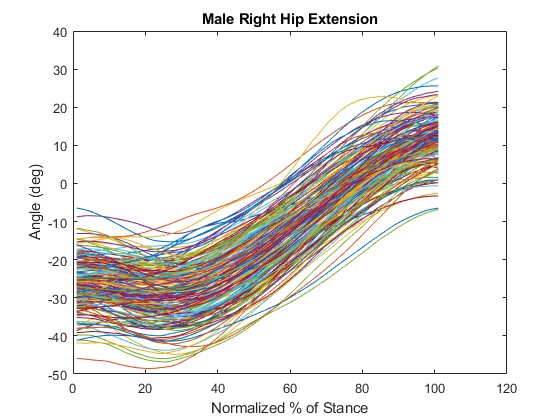

In [41]:
% Plot angle data to investigate data

plt = cellfun(@(x) x(:,3),group_m.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Male Right Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


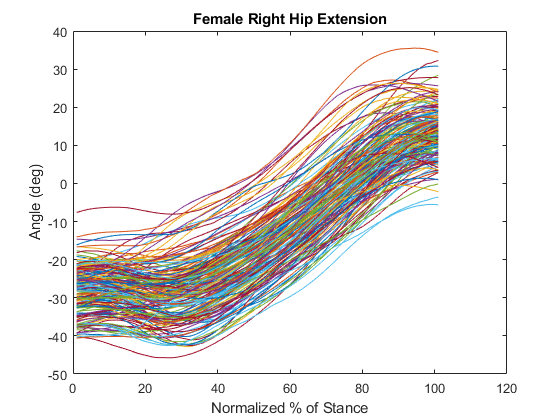

In [42]:

plt = cellfun(@(x) x(:,3),group_f.right_hip,'un',0);
plt = horzcat(plt{:});
figure;
plot(plt)
title('Female Right Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')

In [43]:
% No erroneous data on right side



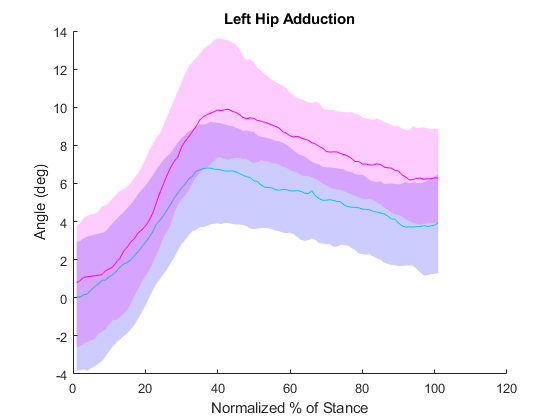

In [44]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,1),group_m.left_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,1),group_f.left_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Left Hip Adduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


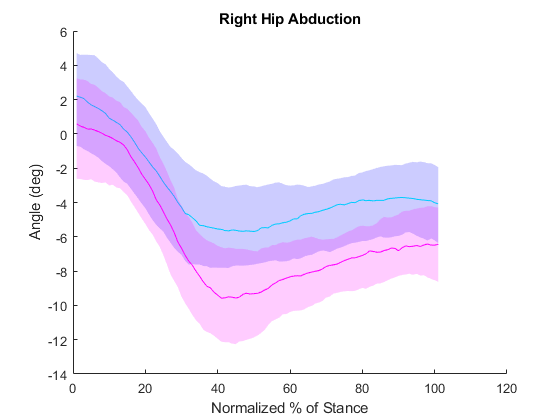

In [45]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,1),group_m.right_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,1),group_f.right_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Right Hip Abduction')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


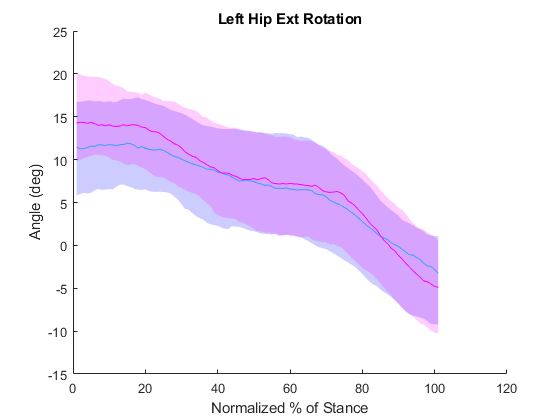

In [47]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,2),group_m.left_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,2),group_f.left_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Left Hip Ext Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


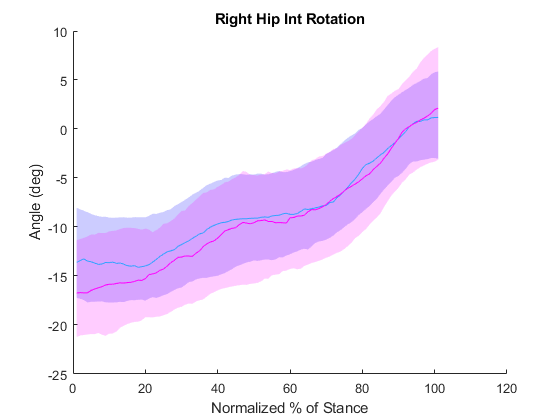

In [48]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,2),group_m.right_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,2),group_f.right_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Right Hip Int Rotation')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


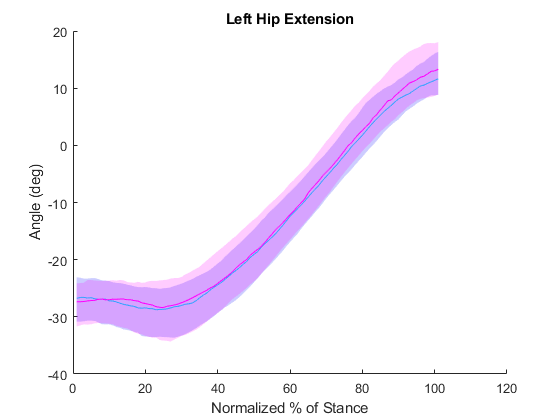

In [49]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,3),group_m.left_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,3),group_f.left_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Left Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


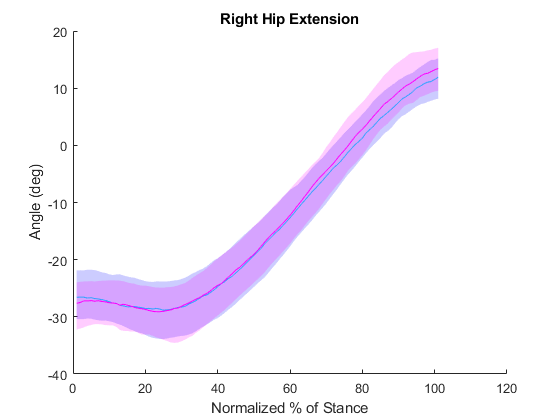

In [50]:
% Plot averaged curves

pltm = cellfun(@(x) x(:,3),group_m.right_hip,'un',0);
pltm = horzcat(pltm{:});
pltm_m = median(pltm,2);
pltm_u = quantile(pltm,0.75,2);
pltm_l = quantile(pltm,0.25,2);

pltf = cellfun(@(x) x(:,3),group_f.right_hip,'un',0);
pltf = horzcat(pltf{:});
pltf_m = median(pltf,2);
pltf_u = quantile(pltf,0.75,2);
pltf_l = quantile(pltf,0.25,2);

figure;
hold on
plot(pltm_m,'c')
fill([1:101,fliplr(1:101)],[pltm_u',fliplr(pltm_l')],'b',"FaceAlpha",0.2,"EdgeColor",'none')
plot(pltf_m,'m')
fill([1:101,fliplr(1:101)],[pltf_u',fliplr(pltf_l')],'m',"FaceAlpha",0.2,"EdgeColor",'none')
title('Right Hip Extension')
xlabel('Normalized % of Stance')
ylabel('Angle (deg)')


### Save Dataset

Export the final data set for further quantitative analysis.


In [51]:
save('tutorial_2.mat','group_f','group_m')


### Interpretation

The following observations were made from this tutorial.

-  Using an algorithm to solve a linear assignment, we were able to select a matched cohort of male and female runners
-  A consistent set of joint angles were calculated and erroneous data could be identified and removed
-  Based on joint angle plots, qualitative differences are apparent in frontal and transverse plane movements at the hip between males and females; these differences agree with findings from previous literature \[1,2\]
### References

\[1\] Ferber R, Davis IM, Williams III DS. Gender differences in lower extremity mechanics during running. Clin Biomech. 2003 May;18(4):350\-7.


\[2\] Gehring D, Mornieux G, Fleischmann J, Gollhofer A. Knee and Hip Joint Biomechanics are Gender\-specific in Runners with High Running Mileage. Int J Sports Med 2014; 35(02):153\-8.

